In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
screen_time=pd.read_csv("screentime_analysis.csv")
print(screen_time.head())
screen_time

         Date        App  Usage (minutes)  Notifications  Times Opened
0  2024-08-07  Instagram               81             24            57
1  2024-08-08  Instagram               90             30            53
2  2024-08-26  Instagram              112             33            17
3  2024-08-22  Instagram               82             11            38
4  2024-08-12  Instagram               59             47            16


,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16
...,...,...,...,...,...
195,2024-08-10,LinkedIn,22,12,5
196,2024-08-23,LinkedIn,5,7,1
197,2024-08-18,LinkedIn,19,2,5
198,2024-08-26,LinkedIn,21,14,1


In [9]:
print(screen_time.columns)

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')


In [11]:
print(screen_time.columns)

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')


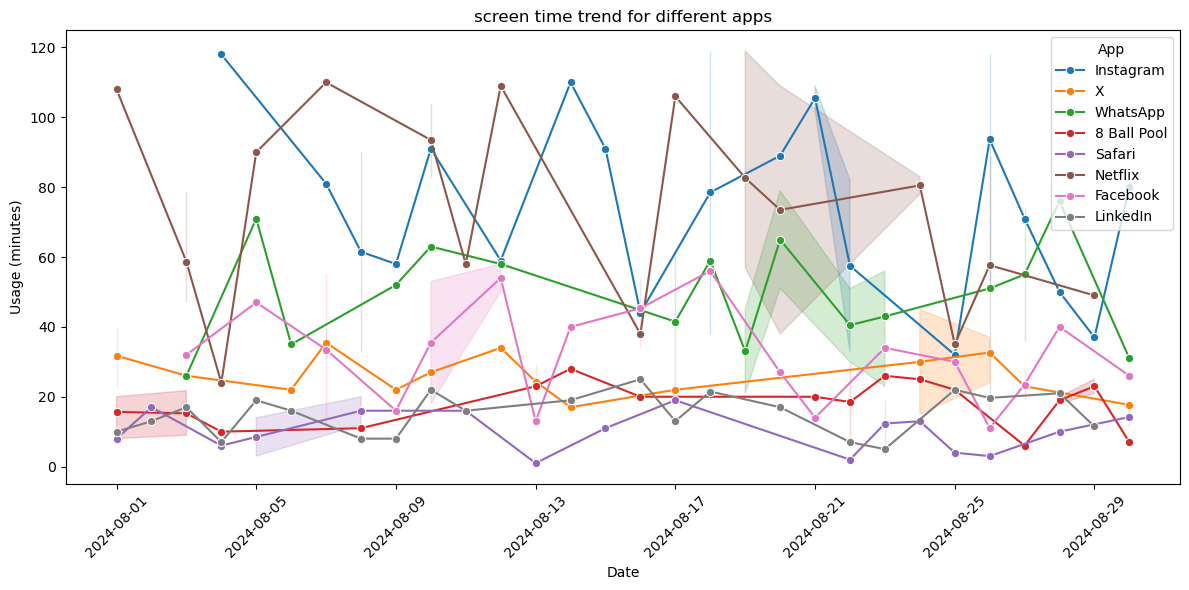

In [13]:
screen_time["Date"]=pd.to_datetime(screen_time["Date"])
plt.figure(figsize=(12,6))
sns.lineplot(x="Date",y="Usage (minutes)",hue="App",data=screen_time,marker="o")
plt.title("screen time trend for different apps")
plt.ylabel("Usage (minutes)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 600x200 with 0 Axes>

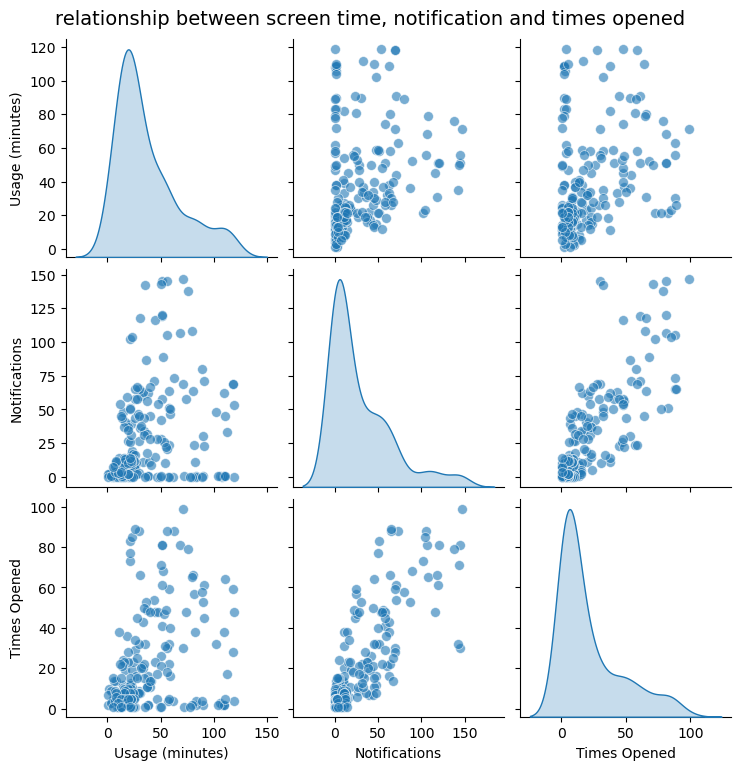

In [14]:
plt.figure(figsize=(6,2))
pairplot=sns.pairplot(screen_time[["Usage (minutes)","Notifications","Times Opened"]],kind="scatter",diag_kind="kde",plot_kws={"alpha":0.6,"s":50})
pairplot.fig.suptitle("relationship between screen time, notification and times opened",y=1.02,fontsize=14)
plt.tight_layout
plt.show()

In [15]:
app_analysis=screen_time.groupby("App").agg(avg_usage=("Usage (minutes)","mean"),avg_notification=("Notifications","mean"),avg_open=("Times Opened","mean")).reset_index()
app_analysis=app_analysis.sort_values(by="avg_usage",ascending=False)
app_analysis                                       

,App,avg_usage,avg_notification,avg_open
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28


C:\Users\DELL\AppData\Local\Temp\ipykernel_14992\3628898877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=weekly_usage.index,y=weekly_usage.values,palette="crest")


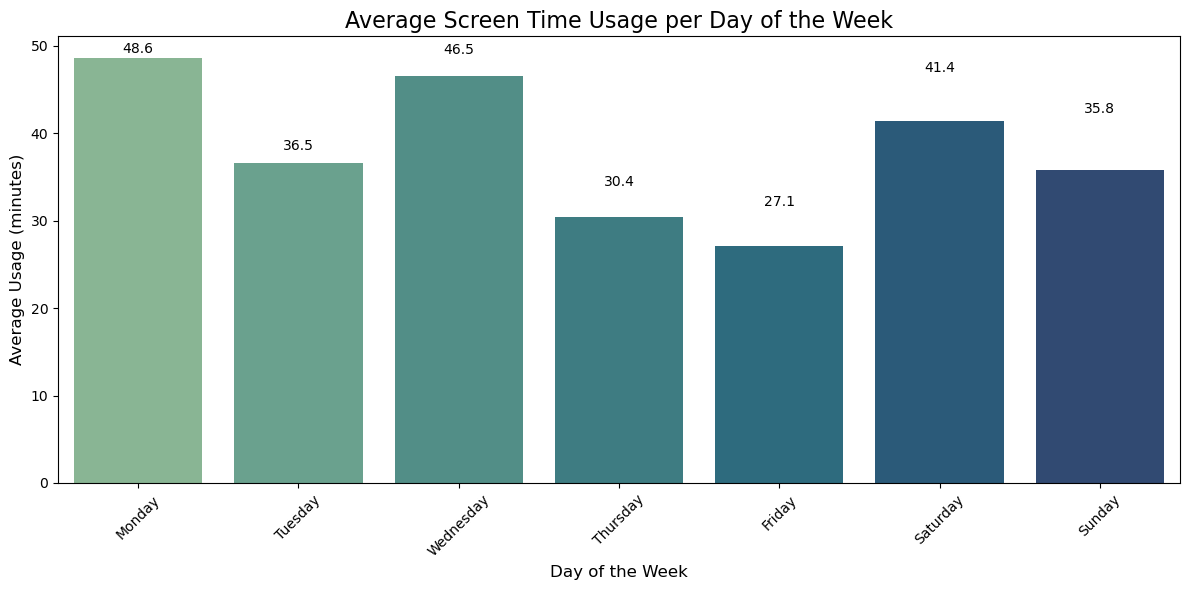

In [16]:
screen_time["Day of week"]=screen_time["Date"].dt.day_name()
weekly_usage=screen_time.groupby("Day of week")["Usage (minutes)"].mean().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.figure(figsize=(12,6))
ax=sns.barplot(x=weekly_usage.index,y=weekly_usage.values,palette="crest")
for p in ax.patches:
    ax.annotate(format(p.get_height(),".1f"),(p.get_x() + (p.get_width()/2.,p.get_height())), ha="center",va="center",xytext=(0,9),textcoords="offset points")
plt.title('Average Screen Time Usage per Day of the Week', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()                 
               
